In [2]:
import pandas as pd
import glob
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
import shutil 
import seaborn as sns
from scipy.signal import butter, filtfilt
from scipy.signal import correlate
import spkit as sp
sp.__version__
from sklearn.decomposition import FastICA
from scipy.signal import butter, filtfilt
from scipy.interpolate import interp1d
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from scipy.stats import zscore
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import keras.backend as K
# Set the floatx attribute explicitly
K.set_floatx('float32')
from keras.layers import Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.layers import LSTM, Dense
import keras.backend as K
import pywt

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [5]:
# Path to the directory containing the CSV files
raw_folder = r"C:\Users\DELL\Desktop\Masters Project\LieWaves dataset for lie detection based on EEG signals and wavelets\Raw"

In [6]:
# Create directories to store truth and false files
truth_folder = "Truth"
false_folder = "False"
os.makedirs(truth_folder, exist_ok=True)
os.makedirs(false_folder, exist_ok=True)

In [7]:
# Iterate through files in the Raw folder
for filename in os.listdir(raw_folder):
    if filename.endswith("S1.csv"):
        # Copy truth files to the Truth folder
        shutil.copy(os.path.join(raw_folder, filename), os.path.join(truth_folder, filename))
    elif filename.endswith("S2.csv"):
        # Copy false files to the False folder
        shutil.copy(os.path.join(raw_folder, filename), os.path.join(false_folder, filename))

In [8]:
# List files in the Truth folder
files_in_truth = os.listdir(truth_folder)

In [9]:
# List files in the False folder
files_in_false = os.listdir(false_folder)

In [10]:
# Print the list of files in the Truth folder
print("Files in Truth folder:")
for filename in files_in_truth:
    print(filename)

Files in Truth folder:
.ipynb_checkpoints
S10S1-Copy1.csv
S10S1-Copy2.csv
S10S1-Copy3.csv
S10S1.csv
S11S1-Copy1.csv
S11S1-Copy2.csv
S11S1-Copy3.csv
S11S1.csv
S12S1.csv
S13S1.csv
S14S1.csv
S15S1.csv
S16S1.csv
S17S1.csv
S18S1.csv
S19S1.csv
S1S1.csv
S20S1.csv
S21S1.csv
S22S1.csv
S23S1.csv
S24S1.csv
S25S1.csv
S26S1.csv
S27S1.csv
S2S1.csv
S3S1.csv
S4S1.csv
S5S1.csv
S6S1.csv
S7S1.csv
S8S1.csv
S9S1.csv


In [11]:
# Print the number of files in the Truth folder
print("Number of files in Truth folder:", len(files_in_truth))

Number of files in Truth folder: 34


In [12]:
# Print the list of files in the False folder ending with "S2.csv"
print("Files in False folder:")
for filename in files_in_false:
    if filename.endswith("S2.csv"):
        print(filename)

Files in False folder:
S10S2.csv
S11S2.csv
S12S2.csv
S13S2.csv
S14S2.csv
S15S2.csv
S16S2.csv
S17S2.csv
S18S2.csv
S19S2.csv
S1S2.csv
S20S2.csv
S21S2.csv
S22S2.csv
S23S2.csv
S24S2.csv
S25S2.csv
S26S2.csv
S27S2.csv
S2S2.csv
S3S2.csv
S4S2.csv
S5S2.csv
S6S2.csv
S7S2.csv
S8S2.csv
S9S2.csv


In [13]:
# List files in the False folder
files_in_false = [file for file in os.listdir(false_folder) if file.endswith("S2.csv")]

# Print the number of files in the False folder
print("Number of files in False folder:", len(files_in_false))

Number of files in False folder: 27


In [14]:
# Convert the list to a set to remove duplicates, then back to a list
files_in_truth = list(set(files_in_truth))


In [15]:
# Filter out files with ".copy.csv" suffix
files_in_truth = [file for file in files_in_truth if not file.endswith(".copy.csv")]


Combine all CSV files in Truth folder together and False folder together

In [16]:
# Path to the directory containing the CSV files
truth_folder_path = "./Truth"

In [17]:
# Path to the directory containing the CSV files
false_folder_path = "./False"

In [18]:
# List all CSV files in the directory
T_csv_files = [file for file in os.listdir(truth_folder_path) if file.endswith('.csv')]

In [19]:
# List all CSV files in the directory
F_csv_files = [file for file in os.listdir(false_folder_path) if file.endswith('.csv')]

In [20]:
# Initialize an empty list to store DataFrames
Tdfs = []

In [21]:
# Initialize an empty list to store DataFrames
Fdfs = []

In [22]:
# Iterate through each CSV file, read it into a DataFrame, and append it to the list
for file in T_csv_files:
    file_path = os.path.join(truth_folder_path, file)
    df = pd.read_csv(file_path)
    Tdfs.append(df)

In [23]:
# Iterate through each CSV file, read it into a DataFrame, and append it to the list
for file in F_csv_files:
    file_path = os.path.join(false_folder_path, file)
    df2 = pd.read_csv(file_path)
    Fdfs.append(df2)

In [24]:
# Check if any Truth files were successfully read
if len(Tdfs) == 0:
    print("No CSV files were read.")
else:
    print("CSV files were successfully read.")

CSV files were successfully read.


In [25]:
# Check if any False files were successfully read
if len(Fdfs) == 0:
    print("No CSV files were read.")
else:
    print("CSV files were successfully read.")

CSV files were successfully read.


In [26]:
# Concatenate all DataFrames in the list along the rows
Truth_df = pd.concat(Tdfs, ignore_index=True)

In [27]:
# Concatenate all DataFrames in the list along the rows
False_df = pd.concat(Fdfs, ignore_index=True)

In [28]:
# Display the combined DataFrame
Truth_df

,EEG.AF3,EEG.T7,EEG.Pz,EEG.T8,EEG.AF4
0,24.98630,-26.45282,4.75641,-22.87943,43.64128
1,21.90964,-38.76044,13.98688,-19.80229,38.51335
2,14.72996,-46.96600,4.24323,-20.82816,37.48747
3,21.39646,-49.01727,10.39703,-34.16166,51.84636
4,18.31980,-59.27362,2.70514,-43.39213,41.07731
...,...,...,...,...,...
316795,162.54709,-4.14149,-11.84573,-6.14782,135.01385
316796,134.85471,-4.14149,-15.43508,-9.73767,112.96258
316797,106.64963,-16.44911,-20.56350,-9.73767,80.14227
316798,78.95725,-24.65419,-19.53762,-10.25036,67.83416


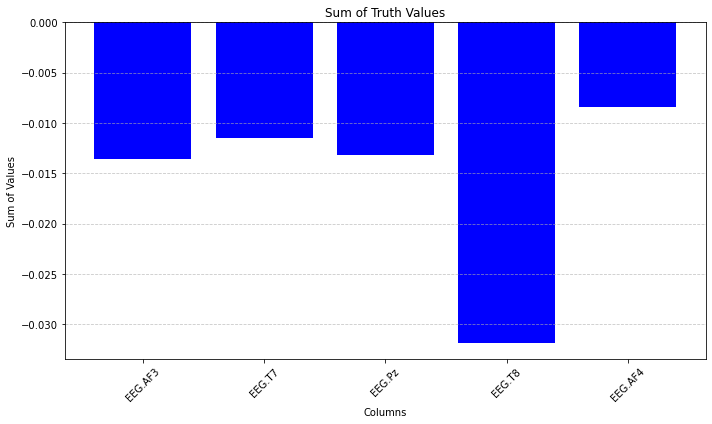

In [36]:
# Calculate the sum of values for each named column
sum_values = Truth_df.sum()

# Plot the barcode
plt.figure(figsize=(10, 6))
plt.bar(sum_values.index, sum_values.values, color='blue')
plt.xlabel('Columns')
plt.ylabel('Sum of Values')
plt.title('Sum of Truth Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [32]:
# Display the combined DataFrame
False_df

,EEG.AF3,EEG.T7,EEG.Pz,EEG.T8,EEG.AF4
0,77.10975,-13.70854,6.35680,20.90323,85.75735
1,68.90467,-9.60600,10.45934,12.69816,84.73147
2,61.21229,-13.70854,-5.43812,-2.17391,79.60354
3,67.87928,-11.65727,2.76696,6.03116,82.68020
4,73.00721,6.80416,9.94616,15.77482,89.34719
...,...,...,...,...,...
316795,208.98768,-10.78991,2.90862,4.54674,177.70769
316796,185.39784,-16.94371,5.47259,10.70055,164.88738
316797,179.24403,-0.53356,-2.21979,15.82897,164.88738
316798,192.57753,7.67152,-11.45026,5.05943,181.29754


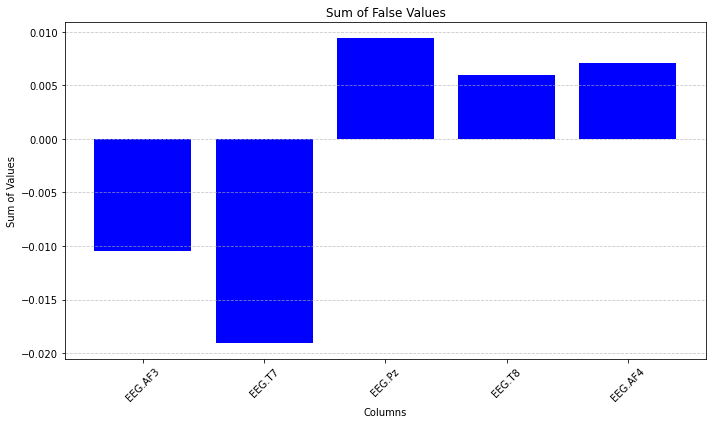

In [34]:
# Calculate the sum of values for each named column
sum_values = False_df.sum()

# Plot the barcode
plt.figure(figsize=(10, 6))
plt.bar(sum_values.index, sum_values.values, color='blue')
plt.xlabel('Columns')
plt.ylabel('Sum of Values')
plt.title('Sum of False Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

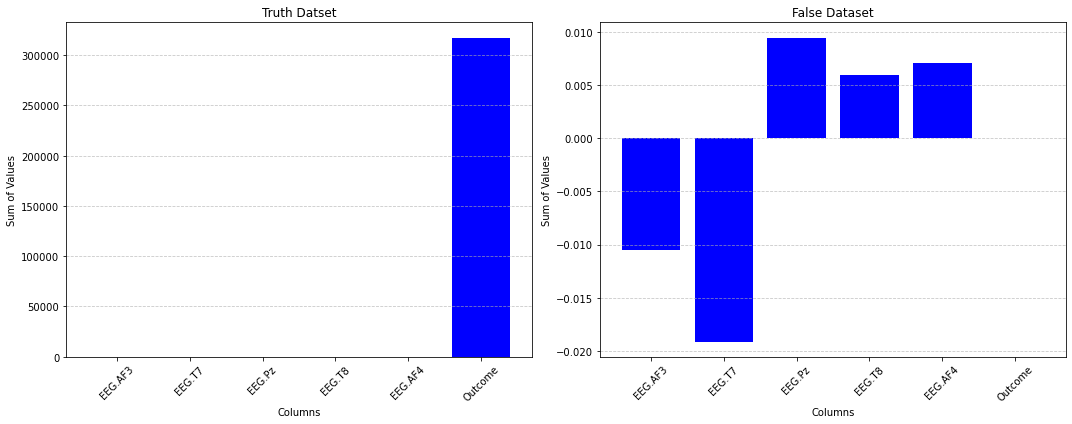

In [68]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Truth DataFrame
sum_values_truth = Truth_df.sum()
axes[0].bar(sum_values_truth.index, sum_values_truth.values, color='blue')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Sum of Values')
axes[0].set_title('Truth Datset')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for False DataFrame
sum_values_false = False_df.sum()
axes[1].bar(sum_values_false.index, sum_values_false.values, color='blue')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Sum of Values')
axes[1].set_title('False Dataset')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Truth EDA

In [38]:
#view first five role
Truth_df.head()

,EEG.AF3,EEG.T7,EEG.Pz,EEG.T8,EEG.AF4
0,24.98630,-26.45282,4.75641,-22.87943,43.64128
1,21.90964,-38.76044,13.98688,-19.80229,38.51335
2,14.72996,-46.96600,4.24323,-20.82816,37.48747
3,21.39646,-49.01727,10.39703,-34.16166,51.84636
4,18.31980,-59.27362,2.70514,-43.39213,41.07731


In [39]:
#Check statistic info
Truth_df.describe()

,EEG.AF3,EEG.T7,EEG.Pz,EEG.T8,EEG.AF4
count,3.168000e+05,3.168000e+05,3.168000e+05,3.168000e+05,3.168000e+05
mean,-4.302399e-08,-3.636364e-08,-4.163510e-08,-1.005366e-07,-2.670455e-08
std,1.374699e+02,4.077950e+01,3.238392e+01,3.806657e+01,7.370736e+01
min,-3.457651e+03,-1.044141e+03,-1.062102e+03,-1.071789e+03,-1.056268e+03
25%,-3.367983e+01,-1.622773e+01,-1.377349e+01,-1.524564e+01,-3.232229e+01
50%,-9.064110e+00,-4.903900e-01,-2.374500e-01,-3.441400e-01,-9.038090e+00
75%,1.543395e+01,1.517727e+01,1.322326e+01,1.455660e+01,1.360521e+01
max,3.641324e+03,9.882961e+02,3.948401e+02,8.360543e+02,1.158301e+03


In [40]:
#check if dataset is empty
Truth_df.empty

False

In [41]:
#Check data type
print(Truth_df.dtypes)

EEG.AF3    float64
EEG.T7     float64
EEG.Pz     float64
EEG.T8     float64
EEG.AF4    float64
dtype: object


In [42]:
#Check for null values
print(Truth_df.isnull().sum())

EEG.AF3    0
EEG.T7     0
EEG.Pz     0
EEG.T8     0
EEG.AF4    0
dtype: int64


Add a new column "Result" to Truth; as Truth = 1

In [43]:
# Adding a new column named 'Numerical_Column' filled with the value 1
Truth_df['Outcome'] = 1

In [44]:
Truth_df.head()

,EEG.AF3,EEG.T7,EEG.Pz,EEG.T8,EEG.AF4,Outcome
0,24.98630,-26.45282,4.75641,-22.87943,43.64128,1
1,21.90964,-38.76044,13.98688,-19.80229,38.51335,1
2,14.72996,-46.96600,4.24323,-20.82816,37.48747,1
3,21.39646,-49.01727,10.39703,-34.16166,51.84636,1
4,18.31980,-59.27362,2.70514,-43.39213,41.07731,1


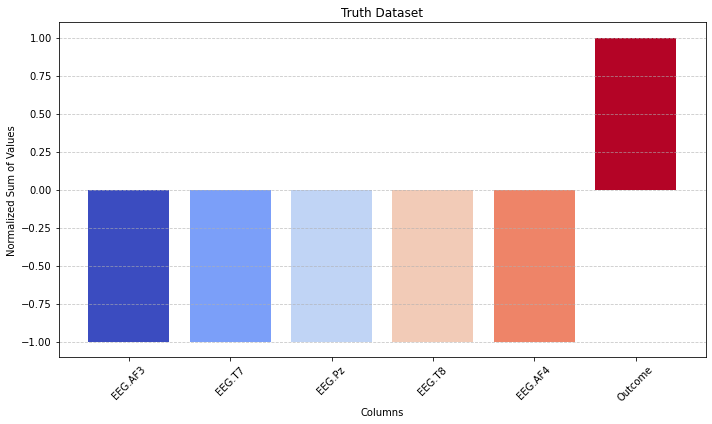

In [54]:
# Calculate the sum of values for each column
sum_values = Truth_df.sum()

# Normalize the sum of values
scaler = MinMaxScaler(feature_range=(-1, 1))
sum_values_normalized = scaler.fit_transform(sum_values.values.reshape(-1, 1)).flatten()

# Plot the barcode
plt.figure(figsize=(10, 6))
plt.bar(sum_values.index, sum_values_normalized, color=plt.cm.coolwarm(np.linspace(0, 1, len(sum_values))))
plt.xlabel('Columns')
plt.ylabel('Normalized Sum of Values')
plt.title('Truth Dataset')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [55]:
Tcorrelation_matrix = Truth_df.corr()
print(Tcorrelation_matrix)

          EEG.AF3    EEG.T7    EEG.Pz    EEG.T8   EEG.AF4  Outcome
EEG.AF3  1.000000  0.177537  0.281417  0.236492  0.568898      NaN
EEG.T7   0.177537  1.000000  0.609247  0.540962  0.357439      NaN
EEG.Pz   0.281417  0.609247  1.000000  0.718150  0.502312      NaN
EEG.T8   0.236492  0.540962  0.718150  1.000000  0.465931      NaN
EEG.AF4  0.568898  0.357439  0.502312  0.465931  1.000000      NaN
Outcome       NaN       NaN       NaN       NaN       NaN      NaN


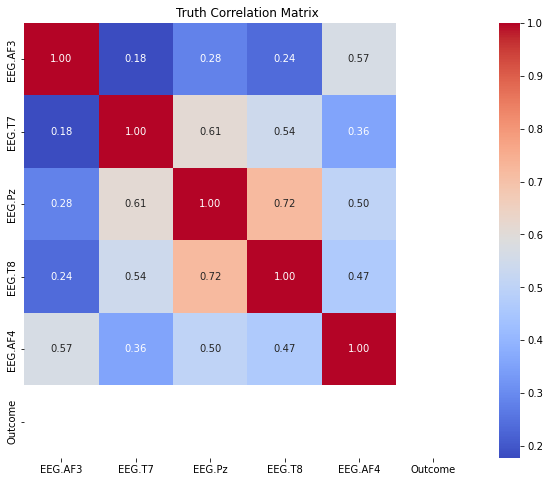

In [56]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(Tcorrelation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Truth Correlation Matrix')
plt.show()

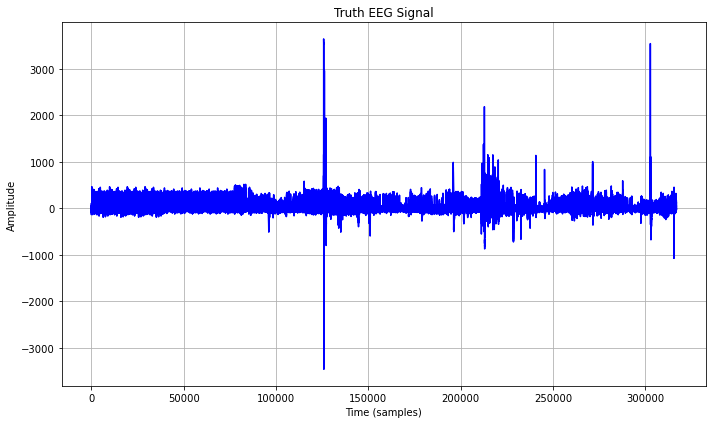

In [57]:
# Assuming artifact_free_signal is a one-dimensional array
plt.figure(figsize=(10, 6))
plt.plot(Truth_df, color='blue')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Truth EEG Signal')
plt.grid(True)
plt.tight_layout()
plt.show()

False EDA

In [58]:
#view first five role
False_df.head()

,EEG.AF3,EEG.T7,EEG.Pz,EEG.T8,EEG.AF4
0,77.10975,-13.70854,6.35680,20.90323,85.75735
1,68.90467,-9.60600,10.45934,12.69816,84.73147
2,61.21229,-13.70854,-5.43812,-2.17391,79.60354
3,67.87928,-11.65727,2.76696,6.03116,82.68020
4,73.00721,6.80416,9.94616,15.77482,89.34719


In [59]:
False_df.describe()

,EEG.AF3,EEG.T7,EEG.Pz,EEG.T8,EEG.AF4
count,3.168000e+05,3.168000e+05,3.168000e+05,3.168000e+05,3.168000e+05
mean,-3.301768e-08,-6.029040e-08,2.986111e-08,1.890783e-08,2.244318e-08
std,9.651036e+01,6.686120e+01,6.809438e+01,6.930604e+01,9.906133e+01
min,-8.490890e+02,-7.638269e+02,-7.733782e+02,-7.643644e+02,-7.597006e+02
25%,-3.759035e+01,-1.499285e+01,-1.497397e+01,-1.518782e+01,-3.762420e+01
50%,-1.191884e+01,-6.973800e-01,-2.440100e-01,-5.390000e-03,-1.134209e+01
75%,1.526036e+01,1.450259e+01,1.486579e+01,1.533085e+01,1.553507e+01
max,3.273475e+03,3.547968e+03,3.534827e+03,3.528969e+03,3.531581e+03


In [60]:
False_df.dtypes

EEG.AF3    float64
EEG.T7     float64
EEG.Pz     float64
EEG.T8     float64
EEG.AF4    float64
dtype: object

In [61]:
False_df.isnull().sum()

EEG.AF3    0
EEG.T7     0
EEG.Pz     0
EEG.T8     0
EEG.AF4    0
dtype: int64

In [62]:
# Adding a new column named 'Numerical_Column' filled with the value 0
False_df['Outcome'] = 0

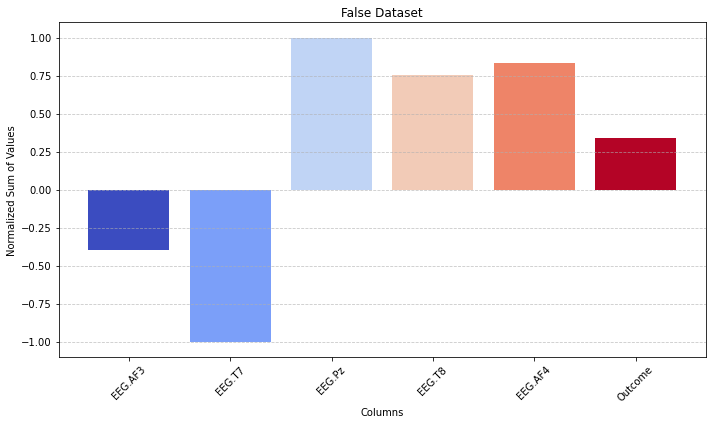

In [66]:
# Calculate the sum of values for each column
sum_values = False_df.sum()

# Normalize the sum of values
scaler = MinMaxScaler(feature_range=(-1, 1))
sum_values_normalized = scaler.fit_transform(sum_values.values.reshape(-1, 1)).flatten()

# Plot the barcode
plt.figure(figsize=(10, 6))
plt.bar(sum_values.index, sum_values_normalized, color=plt.cm.coolwarm(np.linspace(0, 1, len(sum_values))))
plt.xlabel('Columns')
plt.ylabel('Normalized Sum of Values')
plt.title('False Dataset')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

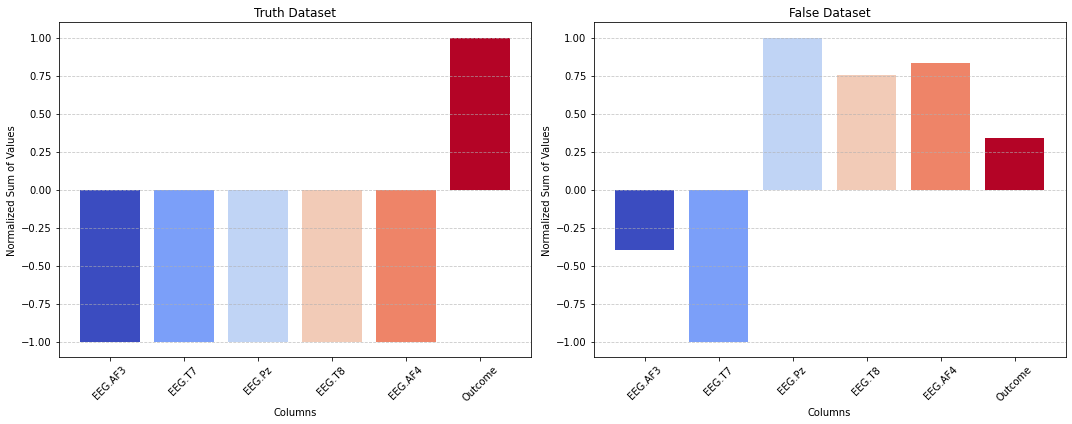

In [67]:
def plot_barcode(ax, df, title):
    # Calculate the sum of values for each column
    sum_values = df.sum()

    # Normalize the sum of values
    scaler = MinMaxScaler(feature_range=(-1, 1))
    sum_values_normalized = scaler.fit_transform(sum_values.values.reshape(-1, 1)).flatten()

    # Plot the barcode
    ax.bar(sum_values.index, sum_values_normalized, color=plt.cm.coolwarm(np.linspace(0, 1, len(sum_values))))
    ax.set_xlabel('Columns')
    ax.set_ylabel('Normalized Sum of Values')
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot barcode for "Truth" dataset
plot_barcode(axes[0], Truth_df, 'Truth Dataset')

# Plot barcode for "False" dataset
plot_barcode(axes[1], False_df, 'False Dataset')

plt.tight_layout()
plt.show()

In [69]:
Fcorrelation_matrix = False_df.corr()
print(Fcorrelation_matrix)

          EEG.AF3    EEG.T7    EEG.Pz    EEG.T8   EEG.AF4  Outcome
EEG.AF3  1.000000  0.551584  0.566111  0.564539  0.893557      NaN
EEG.T7   0.551584  1.000000  0.862742  0.853785  0.665885      NaN
EEG.Pz   0.566111  0.862742  1.000000  0.858924  0.677711      NaN
EEG.T8   0.564539  0.853785  0.858924  1.000000  0.685969      NaN
EEG.AF4  0.893557  0.665885  0.677711  0.685969  1.000000      NaN
Outcome       NaN       NaN       NaN       NaN       NaN      NaN


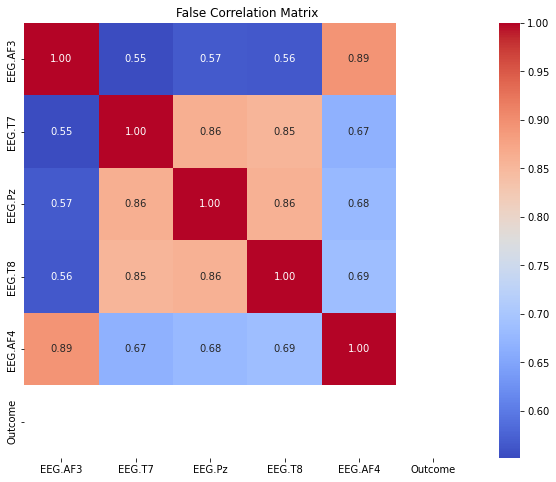

In [70]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(Fcorrelation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('False Correlation Matrix')
plt.show()

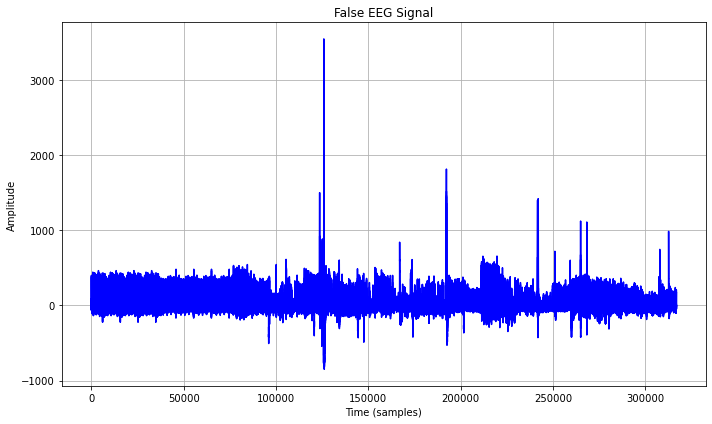

In [71]:
# Assuming artifact_free_signal is a one-dimensional array
plt.figure(figsize=(10, 6))
plt.plot(False_df, color='blue')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('False EEG Signal')
plt.grid(True)
plt.tight_layout()
plt.show()

Combine both Truth and False Data set into one dataset

In [72]:
NewRawdf = pd.concat([Truth_df,False_df],ignore_index=True)

In [73]:
Mixdf = NewRawdf.sample(frac=1).reset_index(drop=True)

In [74]:
Mixdf

,EEG.AF3,EEG.T7,EEG.Pz,EEG.T8,EEG.AF4,Outcome
0,36.28624,9.18428,3.28969,15.68579,37.92233,0
1,-11.81180,-16.44911,-17.99954,6.15980,-11.65265,1
2,-10.97920,-26.72787,-14.93785,-16.80810,-11.01051,1
3,-4.35071,-49.77480,20.85038,29.21425,0.65072,0
4,-57.99297,1.38687,-15.62221,-17.69947,-49.50852,1
...,...,...,...,...,...,...
633595,-21.40431,17.64820,14.64466,-6.09314,-40.67672,0
633596,-190.90209,-20.10102,-18.57941,-16.15423,-162.04524,1
633597,3.73159,13.60889,10.72432,22.30258,8.50419,0
633598,-42.69876,14.82124,-4.31396,18.20397,13.69873,0


In [75]:
correlation_matrix = [False_df.corr,Truth_df.corr()]
print(correlation_matrix)

[<bound method DataFrame.corr of           EEG.AF3    EEG.T7    EEG.Pz    EEG.T8    EEG.AF4  Outcome
0        77.10975 -13.70854   6.35680  20.90323   85.75735        0
1        68.90467  -9.60600  10.45934  12.69816   84.73147        0
2        61.21229 -13.70854  -5.43812  -2.17391   79.60354        0
3        67.87928 -11.65727   2.76696   6.03116   82.68020        0
4        73.00721   6.80416   9.94616  15.77482   89.34719        0
...           ...       ...       ...       ...        ...      ...
316795  208.98768 -10.78991   2.90862   4.54674  177.70769        0
316796  185.39784 -16.94371   5.47259  10.70055  164.88738        0
316797  179.24403  -0.53356  -2.21979  15.82897  164.88738        0
316798  192.57753   7.67152 -11.45026   5.05943  181.29754        0
316799  178.73133  -4.63610  -3.24518  -1.60707  163.34881        0

[316800 rows x 6 columns]>,           EEG.AF3    EEG.T7    EEG.Pz    EEG.T8   EEG.AF4  Outcome
EEG.AF3  1.000000  0.177537  0.281417  0.236492  0.5688

In [76]:
Mixdf.shape

(633600, 6)

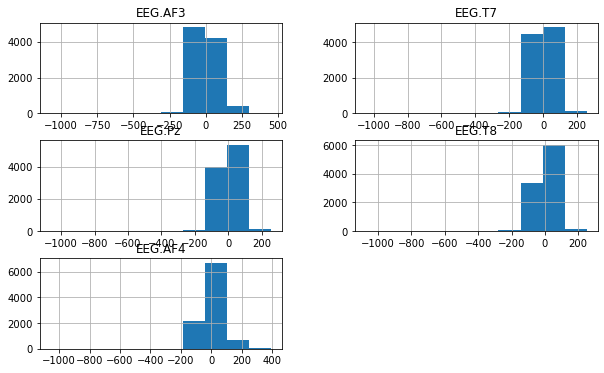

In [79]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df.hist(figsize=(10, 6))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of DataFrame Columns')
plt.show()


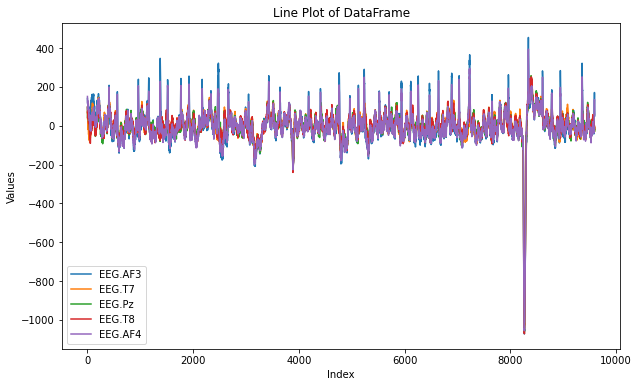

In [80]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df.plot(figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot of DataFrame')
plt.show()

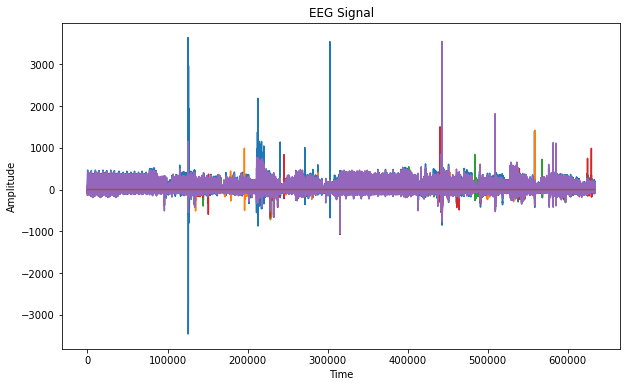

In [77]:
# Plot the cleaned EEG signal
plt.figure(figsize=(10, 6))
plt.plot(NewRawdf)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('EEG Signal')
plt.show()

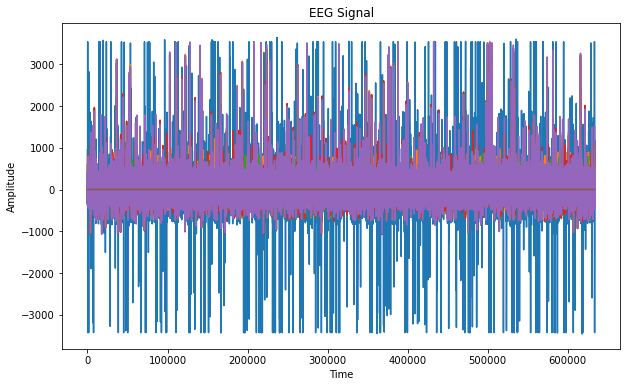

In [51]:
# Plot the cleaned EEG signal
plt.figure(figsize=(10, 6))
plt.plot(Mixdf)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('EEG Signal')
plt.show()

Remove outlayers

In [82]:
z_scores = (Mixdf - Mixdf.mean()) / Mixdf.std()

# Display the resulting DataFrame with z-scores
print(z_scores)

         EEG.AF3    EEG.T7    EEG.Pz    EEG.T8   EEG.AF4   Outcome
0       0.305519  0.165848  0.061700  0.280543  0.434344 -0.999999
1      -0.099452 -0.297035 -0.337590  0.110169 -0.133464  0.999999
2      -0.092442 -0.482647 -0.280167 -0.300615 -0.126109  0.999999
3      -0.036632 -0.898824  0.391059  0.522501  0.007453 -0.999999
4      -0.488283  0.025044 -0.293002 -0.316557 -0.567046  0.999999
...          ...       ...       ...       ...       ...       ...
633595 -0.180218  0.318688  0.274668 -0.108977 -0.465891 -0.999999
633596 -1.607338 -0.362980 -0.348466 -0.288921 -1.855986  0.999999
633597  0.031419  0.245747  0.201140  0.398885  0.097403 -0.999999
633598 -0.359511  0.267639 -0.080910  0.325581  0.156899 -0.999999
633599  0.110455 -0.103045 -0.047472  0.161119 -0.031206  0.999999

[633600 rows x 6 columns]


In [83]:
# Assuming df is your Truth_df DataFrame
# Calculate z-scores for each column
z_scores = (Mixdf - Mixdf.mean()) / Mixdf.std()

# Define threshold for filtering outliers (e.g., z-score > 3 or < -3)
threshold = 3

# Filter out outliers based on the threshold
filtered_df = Mixdf[(z_scores.abs() < threshold).all(axis=1)]

In [84]:
filtered_df

,EEG.AF3,EEG.T7,EEG.Pz,EEG.T8,EEG.AF4,Outcome
0,36.28624,9.18428,3.28969,15.68579,37.92233,0
1,-11.81180,-16.44911,-17.99954,6.15980,-11.65265,1
2,-10.97920,-26.72787,-14.93785,-16.80810,-11.01051,1
3,-4.35071,-49.77480,20.85038,29.21425,0.65072,0
4,-57.99297,1.38687,-15.62221,-17.69947,-49.50852,1
...,...,...,...,...,...,...
633595,-21.40431,17.64820,14.64466,-6.09314,-40.67672,0
633596,-190.90209,-20.10102,-18.57941,-16.15423,-162.04524,1
633597,3.73159,13.60889,10.72432,22.30258,8.50419,0
633598,-42.69876,14.82124,-4.31396,18.20397,13.69873,0


In [85]:
filtered_df.shape

(609467, 6)

In [86]:
filtered_df.dtypes

EEG.AF3    float64
EEG.T7     float64
EEG.Pz     float64
EEG.T8     float64
EEG.AF4    float64
Outcome      int64
dtype: object

In [57]:
filtered_df.isnull().sum()

EEG.AF3    0
EEG.T7     0
EEG.Pz     0
EEG.T8     0
EEG.AF4    0
Outcome    0
dtype: int64

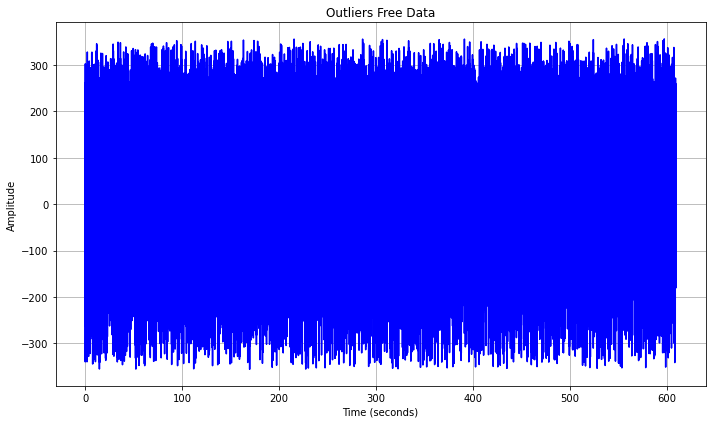

In [58]:
time = np.arange(len(filtered_df)) / 1000 # Assuming sampling rate of 1000 Hz

plt.figure(figsize=(10, 6))
plt.plot(time, filtered_df.values, color='blue')  # Use .values to get the underlying numpy array
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Outliers Free Data')
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

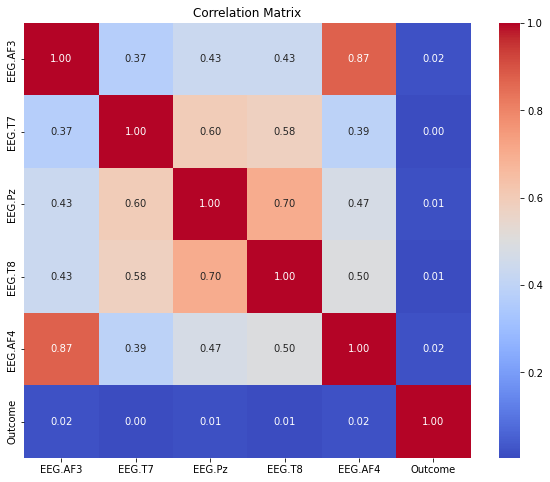

In [88]:
# Assuming filtered_df is your DataFrame
Fcorrelation_matrix = filtered_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(Fcorrelation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

                            CNN

"EEG.T7", "EEG.Pz", "EEG.T8",

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

# Assuming you have your EEG data stored in a DataFrame called 'filtered_df'
# Load and preprocess the data

# Split the data into features (X) and target (y)
X = filtered_df[["EEG.AF3","EEG.T7", "EEG.Pz", "EEG.T8","EEG.AF4"]].values
y = filtered_df["Outcome"].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the input data for CNN (add a channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(5, 1)),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Print the loss
print(f"Test Loss: {loss}")


C:\Users\DELL\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Epoch 1/15


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 1280, but received input with shape (None, 512)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 2, 1), dtype=float32)
  • training=True
  • mask=None

        LSTM model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming you have your EEG data stored in a DataFrame called 'eeg_data'
# Load and preprocess the data

# Split the data into features (X) and target (y)
X = filtered_df[["EEG.AF3", "EEG.T7", "EEG.Pz", "EEG.T8", "EEG.AF4"]].values
y = filtered_df["Outcome"].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the input data for LSTM (add a time step dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential([
    LSTM(units=64, input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


CNN +  LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, LSTM

# Assuming you have your EEG data stored in a DataFrame called 'filtered_df'
# Load and preprocess the data

# Split the data into features (X) and target (y)
X = filtered_df[["EEG.AF3", "EEG.T7", "EEG.Pz", "EEG.T8", "EEG.AF4"]].values
y = filtered_df["Outcome"].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the input data for CNN (add a channel dimension)
X_train_cnn = X_train_cnn.reshape(X_train_cnn.shape[0], X_train_cnn.shape[1], 1)
X_test_cnn = X_test_cnn.reshape(X_test_cnn.shape[0], X_test_cnn.shape[1], 1)

# Reshape the input data for LSTM (add a time step dimension)
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1)

# Build the CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(5, 1)),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=15, batch_size=64, validation_data=(X_test_cnn, y_test_cnn))

# Build the LSTM model
lstm_model = Sequential([
    LSTM(units=64, input_shape=(X_train_lstm.shape[1], 1)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

# Combine predictions
cnn_pred = cnn_model.predict(X_test_cnn)
lstm_pred = lstm_model.predict(X_test_lstm)

# Combine predictions using a weighted average
combined_pred = (cnn_pred + lstm_pred) / 2

# Calculate accuracy
combined_accuracy = np.mean((combined_pred > 0.5) == y_test_cnn)

print(f"Combined Test Accuracy: {combined_accuracy * 100:.2f}%")


Epoch 1/15


C:\Users\DELL\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


7619/7619 ━━━━━━━━━━━━━━━━━━━━ 108s 14ms/step - accuracy: 0.5514 - loss: 0.6833 - val_accuracy: 0.5722 - val_loss: 0.6718
Epoch 2/15
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 108s 14ms/step - accuracy: 0.5770 - loss: 0.6713 - val_accuracy: 0.5783 - val_loss: 0.6681
Epoch 3/15
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 106s 14ms/step - accuracy: 0.5792 - loss: 0.6682 - val_accuracy: 0.5850 - val_loss: 0.6631
Epoch 4/15
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 141s 14ms/step - accuracy: 0.5833 - loss: 0.6656 - val_accuracy: 0.5859 - val_loss: 0.6625
Epoch 5/15
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 107s 14ms/step - accuracy: 0.5845 - loss: 0.6638 - val_accuracy: 0.5869 - val_loss: 0.6615
Epoch 6/15
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 106s 14ms/step - accuracy: 0.5876 - loss: 0.6622 - val_accuracy: 0.5872 - val_loss: 0.6604
Epoch 7/15
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 101s 13ms/step - accuracy: 0.5883 - loss: 0.6607 - val_accuracy: 0.5890 - val_loss: 0.6601
Epoch 8/15
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 97s 13ms/step - accuracy: 0.5904 - los

C:\Users\DELL\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


15237/15237 ━━━━━━━━━━━━━━━━━━━━ 88s 6ms/step - accuracy: 0.5158 - loss: 0.6919 - val_accuracy: 0.5651 - val_loss: 0.6803
Epoch 2/10
15237/15237 ━━━━━━━━━━━━━━━━━━━━ 85s 6ms/step - accuracy: 0.5566 - loss: 0.6820 - val_accuracy: 0.5677 - val_loss: 0.6771
Epoch 3/10
15237/15237 ━━━━━━━━━━━━━━━━━━━━ 84s 6ms/step - accuracy: 0.5644 - loss: 0.6787 - val_accuracy: 0.5736 - val_loss: 0.6728
Epoch 4/10
15237/15237 ━━━━━━━━━━━━━━━━━━━━ 140s 5ms/step - accuracy: 0.5675 - loss: 0.6768 - val_accuracy: 0.5748 - val_loss: 0.6717
Epoch 5/10
15237/15237 ━━━━━━━━━━━━━━━━━━━━ 79s 5ms/step - accuracy: 0.5705 - loss: 0.6748 - val_accuracy: 0.5776 - val_loss: 0.6698
Epoch 6/10
15237/15237 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.5720 - loss: 0.6742 - val_accuracy: 0.5786 - val_loss: 0.6688
Epoch 7/10
15237/15237 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.5733 - loss: 0.6724 - val_accuracy: 0.5787 - val_loss: 0.6689
Epoch 8/10
15237/15237 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.5760 - l

In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Assuming you have your EEG data stored in a DataFrame called 'filtered_df'
# Load and preprocess the data

# Split the data into features (X) and target (y)
X = filtered_df[["EEG.AF3", "EEG.AF4"]].values
y = filtered_df["Outcome"].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the input data for CNN (add a channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(2, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Print the loss
print(f"Test Loss: {loss}")


Epoch 1/10


C:\Users\DELL\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


15237/15237 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.5329 - loss: 0.6895 - val_accuracy: 0.5370 - val_loss: 0.6876
Epoch 2/10
15237/15237 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.5387 - loss: 0.6877 - val_accuracy: 0.5387 - val_loss: 0.6865
Epoch 3/10
15237/15237 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.5378 - loss: 0.6875 - val_accuracy: 0.5360 - val_loss: 0.6876
Epoch 4/10
15237/15237 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.5391 - loss: 0.6874 - val_accuracy: 0.5363 - val_loss: 0.6869
Epoch 5/10
15237/15237 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.5389 - loss: 0.6872 - val_accuracy: 0.5381 - val_loss: 0.6865
Epoch 6/10
15237/15237 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.5388 - loss: 0.6869 - val_accuracy: 0.5383 - val_loss: 0.6866
Epoch 7/10
15237/15237 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.5395 - loss: 0.6870 - val_accuracy: 0.5383 - val_loss: 0.6864
Epoch 8/10
15237/15237 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.5388 - lo

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your EEG data stored in a DataFrame called 'eeg_data'
# Load and preprocess the data
X = filtered_df[["EEG.AF3", "EEG.T7", "EEG.Pz", "EEG.T8", "EEG.AF4"]].values
y = filtered_df["Outcome"].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
